In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
#P1A
dir = '/home/aspen/Coursework/EE595/ns-3-dev/contrib/uwee595/experiments/results/Lab1/P1a/20241029_172558'
data = pd.read_csv(dir + '/wifi-dcf.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.6804,0.000168,0.262308,0.262476,1,20,1500,6,20,5,0.000100,0,15,6
1,1.000000,0.8610,0.000267,0.262850,0.263117,1,20,1500,6,20,5,0.000126,0,15,6
2,1.000000,1.0770,0.000639,0.262965,0.263604,1,20,1500,6,20,5,0.000158,0,15,6
3,1.000000,1.3074,0.000706,0.264841,0.265548,1,20,1500,6,20,5,0.000200,0,15,6
4,0.999279,1.6638,0.001174,0.266623,0.267797,1,20,1500,6,20,5,0.000251,0,15,6


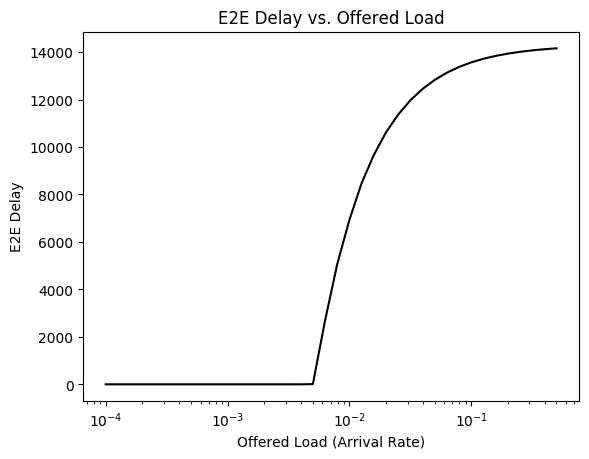

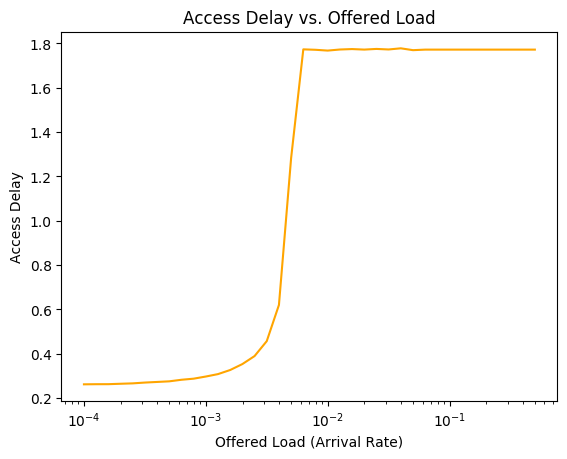

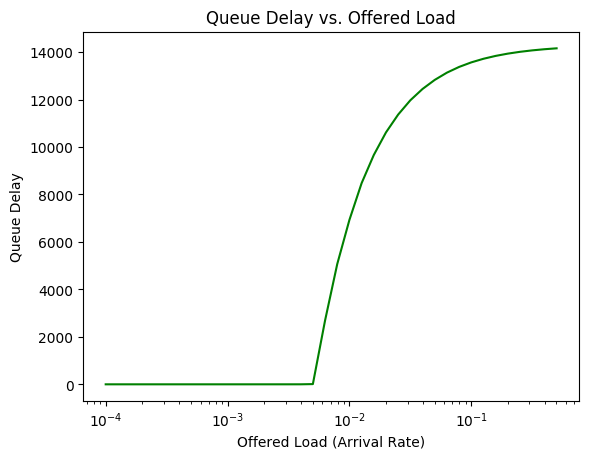

In [58]:
x = np.array(data[11])
e2e = np.array(data[2])
access = np.array(data[3])
queue = np.array(data[4])
#Normalize values
# e2e = e2e/max(e2e)
# access = access/max(access)
# queue = queue/max(queue)    

plt.figure()
plt.plot(x, e2e, color='black')
plt.xscale('log')
plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("E2E Delay")
plt.title("E2E Delay vs. Offered Load")
plt.savefig(dir+'/plotA.png', format='png', dpi=300)

plt.figure()
plt.plot(x, access, color='orange')
plt.xscale('log')
plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("Access Delay")
plt.title("Access Delay vs. Offered Load")
plt.savefig(dir+'/plotB.png', format='png', dpi=300)

plt.figure()
plt.plot(x, queue, color='green')
plt.xscale('log')
plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("Queue Delay")
plt.title("Queue Delay vs. Offered Load")
plt.savefig(dir+'/plotC.png', format='png', dpi=300)


In [ ]:
#P1B
dir = '/home/aspen/Coursework/EE595/ns-3-dev/contrib/uwee595/experiments/results/Lab1/P1b/20241106_141700'
data = pd.read_csv(dir + '/wifi-dcf.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.6804,0.000168,0.262308,0.262476,1,20,1500,6,20,5,0.0001,0,15,6
1,0.998124,1.2768,0.000441,0.266393,0.266834,1,20,1500,6,20,10,0.0001,0,15,6
2,0.998798,1.9938,0.000219,0.268352,0.268571,1,20,1500,6,20,15,0.0001,0,15,6
3,0.994259,6.6504,0.006283,0.297449,0.303732,1,20,1500,6,20,5,0.0010,0,15,6
4,0.999092,2.6394,0.000301,0.273427,0.273728,1,20,1500,6,20,20,0.0001,0,15,6


In [16]:
x = data[11]   # Lambda
y = data[1]               # SLD Throughput
slds = data[10]           # Num. SLDs
n_slds = slds.unique()
x = np.array(x)
y = np.array(y)

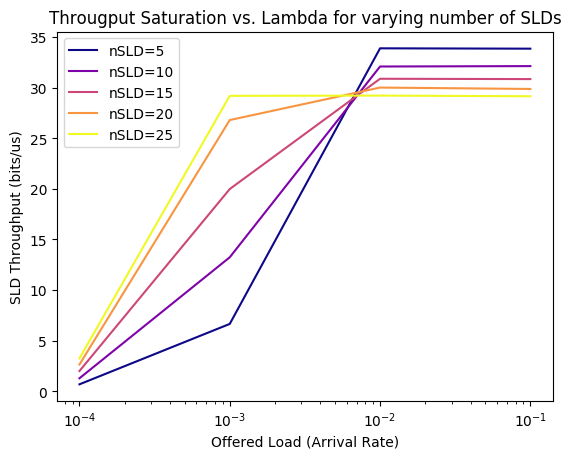

In [21]:
plt.figure()
colors = plt.cm.plasma(np.linspace(0, 1, len(n_slds)))
for idx, n in enumerate(n_slds):
    subset = slds == n
    plt.plot(x[subset], y[subset], label=f'nSLD={n}', color=colors[idx])

plt.xscale('log')
plt.legend()
plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("SLD Throughput (bits/us)")
plt.title("Througput Saturation vs. Lambda for varying number of SLDs")
plt.savefig(dir+'/plot_fixed.png', format='png', dpi=300)

In [9]:
y.head()

0    0.6804
1    1.2768
2    1.9938
3    6.6504
4    2.6394
Name: 1, dtype: float64

In [60]:
#P3AB
dir = '/home/aspen/Coursework/EE595/ns-3-dev/contrib/uwee595/experiments/results/Lab1/P3a/20241106_130351'
data = pd.read_csv(dir + '/wifi-dcf.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.966443,3.04818,11212.00,3.93565,11215.90,1,20,150,6,20,10,0.01,0,1022,6
1,0.934997,4.27032,9844.85,2.80940,9847.66,1,20,150,6,20,10,0.01,0,510,6
2,0.885557,5.30580,8648.85,2.26058,8651.11,1,20,150,6,20,10,0.01,0,254,6
3,0.806258,5.88270,7987.30,2.03925,7989.34,1,20,150,6,20,10,0.01,0,126,6
4,0.716620,6.07344,7752.98,1.97443,7754.95,1,20,150,6,20,10,0.01,0,62,6


In [61]:
throughput = np.array(data[1])      #SLD Throughput
e2e = np.array(data[2])             #E2E Delay
x = np.array(data[13])             #CW_min
n_sld = np.array(data[10])
subset = n_sld == 10

No handles with labels found to put in legend.


No handles with labels found to put in legend.


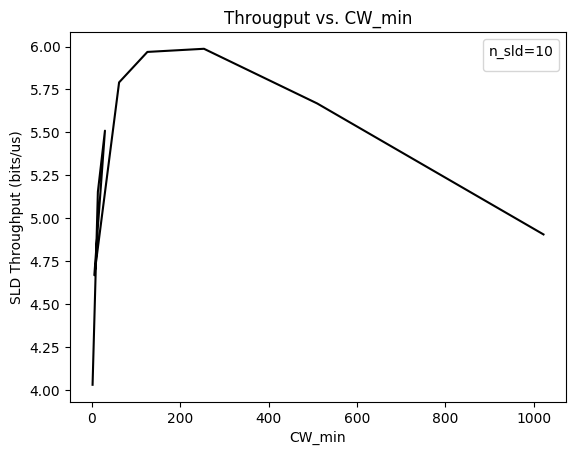

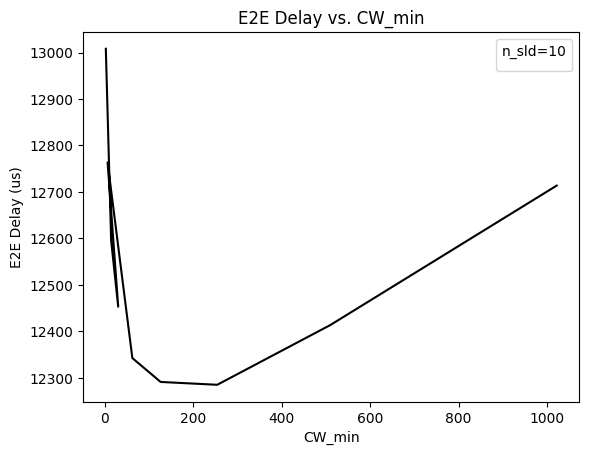

In [53]:
plt.figure()
plt.plot(x[subset], throughput[subset], color='k')

plt.legend(title=f'n_sld=10')
plt.xlabel("CW_min")
plt.ylabel("SLD Throughput (bits/us)")
plt.title("Througput vs. CW_min")
plt.savefig(dir+'/plot3A1.png', format='png', dpi=300)

plt.figure()
plt.plot(x[subset], e2e[subset], color='k')

plt.legend(title=f'n_sld=10')
plt.xlabel("CW_min")
plt.ylabel("E2E Delay (us)")
plt.title("E2E Delay vs. CW_min")
plt.savefig(dir+'/plot3B1.png', format='png', dpi=300)

27
27
27
27


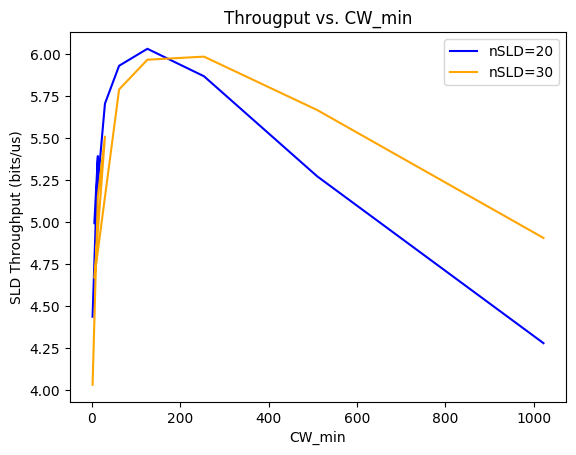

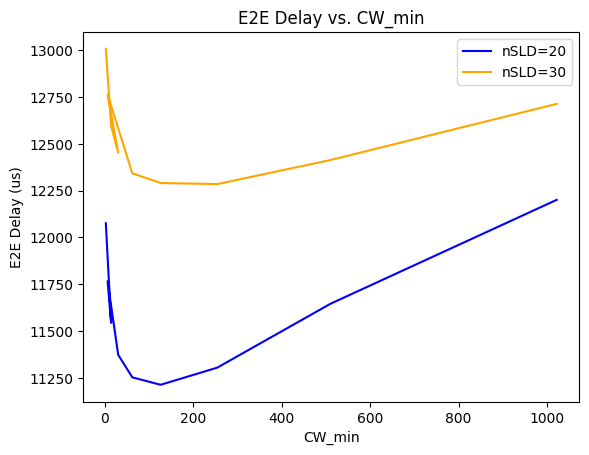

In [54]:
plt.figure()

colors2 = ['blue','orange']
for idx, n in enumerate([20,30]):
    subset = n_sld == n
    print(len(x))
    plt.plot(x[subset], throughput[subset], label=f'nSLD={n}', color=colors2[idx])


plt.legend()
plt.xlabel("CW_min")
plt.ylabel("SLD Throughput (bits/us)")
plt.title("Througput vs. CW_min")
plt.savefig(dir+'/plot3A2.png', format='png', dpi=300)

plt.figure()

colors2 = ['blue','orange']
for idx, n in enumerate([20,30]):
    subset = n_sld == n
    print(len(x))
    plt.plot(x[subset], e2e[subset], label=f'nSLD={n}', color=colors2[idx])


plt.legend()
plt.xlabel("CW_min")
plt.ylabel("E2E Delay (us)")
plt.title("E2E Delay vs. CW_min")
plt.savefig(dir+'/plot3B2.png', format='png', dpi=300)

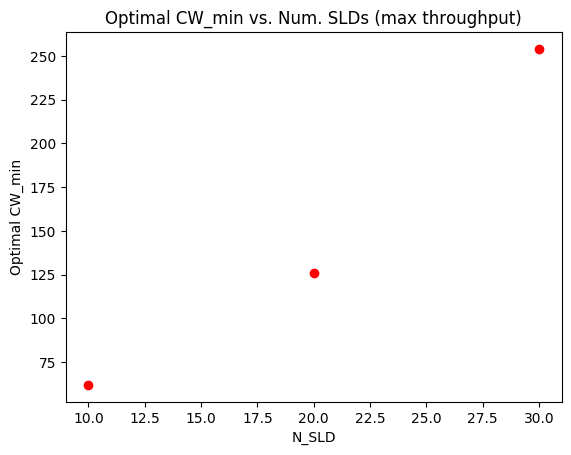

In [62]:
n10_max_tp = np.max(throughput[n_sld==10])
n20_max_tp = np.max(throughput[n_sld==20])
n30_max_tp = np.max(throughput[n_sld==30])

n10_best_cw = x[throughput==n10_max_tp]
n20_best_cw = x[throughput==n20_max_tp]
n30_best_cw = x[throughput==n30_max_tp]

slds = [10, 20, 30]

plt.figure()
plt.scatter(slds, [n10_best_cw, n20_best_cw, n30_best_cw], color='red')

# plt.legend(title=f'n_sld=10')
plt.xlabel("N_SLD")
plt.ylabel("Optimal CW_min")
plt.title("Optimal CW_min vs. Num. SLDs (max throughput)")
plt.savefig(dir+'/plot3A3.png', format='png', dpi=300)


In [1]:
##LAB 2##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
dir = "/home/aspen/Coursework/EE595/ns-3-dev/contrib/uwee595/experiments/results/Lab2/P1a/20241119_121236"
data = pd.read_csv(dir+'/wifi-mld.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1.0,1.0,1.0,0.0276,0.0360,0.0636,0.0,0.0,0.0,0.202156,...,15,6,15,6,15,6,15,6,15,6
1,1.0,1.0,1.0,0.0420,0.0504,0.0924,0.0,0.0,0.0,0.222980,...,15,6,15,6,15,6,15,6,15,6
2,1.0,1.0,1.0,0.0552,0.0624,0.1176,0.0,0.0,0.0,0.231404,...,15,6,15,6,15,6,15,6,15,6
3,1.0,1.0,1.0,0.0804,0.0984,0.1788,0.0,0.0,0.0,0.239702,...,15,6,15,6,15,6,15,6,15,6
4,1.0,1.0,1.0,0.0684,0.0804,0.1488,0.0,0.0,0.0,0.236159,...,15,6,15,6,15,6,15,6,15,6


In [41]:
x = np.array(data[29])
queueL1 = np.array(data[6])
queueL2 = np.array(data[7])
queueAgg = np.array(data[8])

Text(0.5, 1.0, 'Link I/II/Agggregate Queue Delays vs. Offered Load')

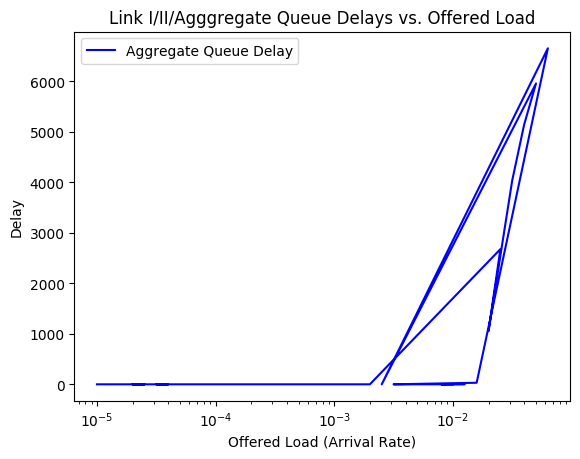

In [51]:
plt.figure()
# plt.scatter(x, queueL1, label='Link I Queue Delay', color='black')
# plt.plot(x, queueL2, label='Link II Queue Delay', color='orange')
plt.plot(x, queueAgg, label='Aggregate Queue Delay', color='blue')
plt.xscale('log')
plt.legend()
plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("Delay")
plt.title("Link I/II/Agggregate Queue Delays vs. Offered Load")

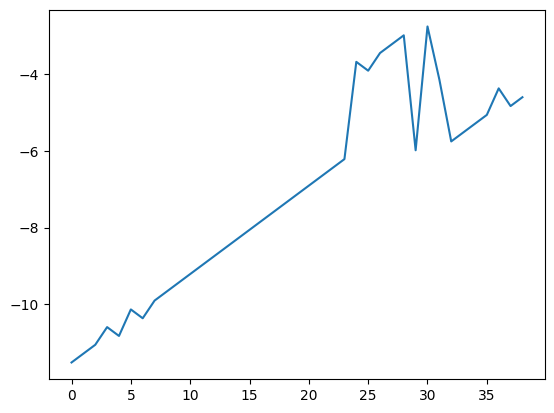

In [43]:
plt.plot(np.log(x))


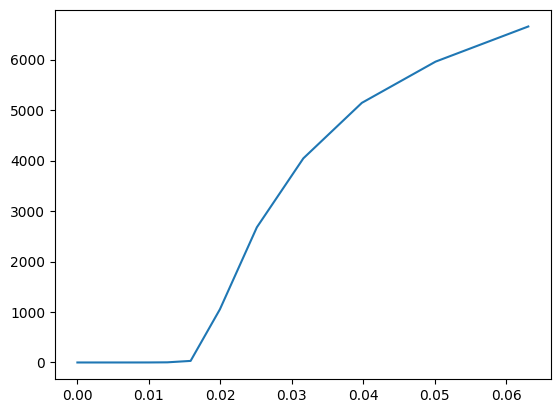

In [62]:
plt.plot(np.sort((x)),np.sort(queueAgg))

In [36]:
print(t)

[1e-05, 1.2589254117941661e-05, 1.5848931924611107e-05, 1.9952623149688746e-05, 2.511886431509572e-05, 3.1622776601683667e-05, 3.981071705534953e-05, 5.011872336272694e-05, 6.309573444801891e-05, 7.943282347242757e-05, 9.999999999999918e-05, 0.00012589254117941558, 0.0001584893192461098, 0.00019952623149688584, 0.00025118864315095514, 0.00031622776601683404, 0.00039810717055349204, 0.0005011872336272653, 0.000630957344480184, 0.0007943282347242692, 0.0009999999999999835, 0.0012589254117941456, 0.001584893192461085, 0.001995262314968842, 0.002511886431509531, 0.0031622776601683148, 0.0039810717055348875, 0.005011872336272612, 0.006309573444801788, 0.007943282347242626, 0.009999999999999754, 0.012589254117941352, 0.01584893192461072, 0.019952623149688258, 0.025118864315095104, 0.03162277660168289, 0.039810717055348555, 0.050118723362725714, 0.06309573444801736]


In [38]:
print(data[20:35])

          0         1         2        3        4         5            6   \
20  0.997083  0.998582  0.997843   3.2820   3.3792    6.6612     0.002603   
21  0.998261  0.997172  0.997710   4.1340   4.2312    8.3652     0.003526   
22  0.993625  0.994649  0.994142   5.2368   5.3532   10.5900     0.005847   
23  0.994554  0.996456  0.995516   6.5748   6.7476   13.3224     0.007292   
24  0.726815  0.731080  0.728946  58.8336  59.1192  117.9530  2739.310000   
25  0.719522  0.733262  0.726368  58.1172  58.8240  116.9410  1020.680000   
26  0.734478  0.728101  0.731294  59.3640  58.6704  118.0340  4042.290000   
27  0.736655  0.720425  0.728517  59.1192  58.1400  117.2590  5136.770000   
28  0.731683  0.720403  0.726034  59.0784  58.3440  117.4220  5916.870000   
29  0.993182  0.991571  0.992364   8.2164   8.4696   16.6860     0.010636   
30  0.759448  0.731683  0.745491  60.6696  59.0784  119.7480  6665.210000   
31  0.734951  0.731481  0.733218  52.6872  52.3392  105.0260    31.286600   

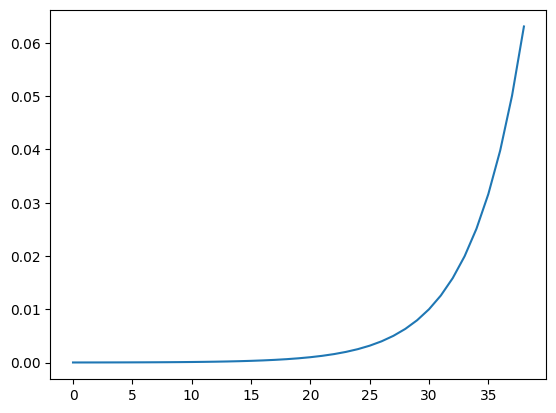

In [48]:
plt.plot(np.sort(x))

In [63]:
#p1b
dir = "/home/aspen/Coursework/EE595/ns-3-dev/contrib/uwee595/experiments/results/Lab2/P1b/20241120_144214"
data = pd.read_csv(dir+'/wifi-mld.dat', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1.000000,1.000000,1.000000,0.3492,0.3840,0.7332,0.000000,0.000000,0.000000,0.258364,...,15,6,15,6,15,6,15,6,15,6
1,1.000000,1.000000,1.000000,0.6168,0.7056,1.3224,0.000043,0.000092,0.000069,0.256497,...,15,6,15,6,15,6,15,6,15,6
2,1.000000,1.000000,1.000000,0.9468,1.0236,1.9704,0.000195,0.000244,0.000220,0.260242,...,15,6,15,6,15,6,15,6,15,6
3,0.997083,0.998582,0.997843,3.2820,3.3792,6.6612,0.002603,0.002338,0.002469,0.273750,...,15,6,15,6,15,6,15,6,15,6
4,1.000000,1.000000,1.000000,1.2972,1.3524,2.6496,0.000000,0.000208,0.000106,0.260981,...,15,6,15,6,15,6,15,6,15,6


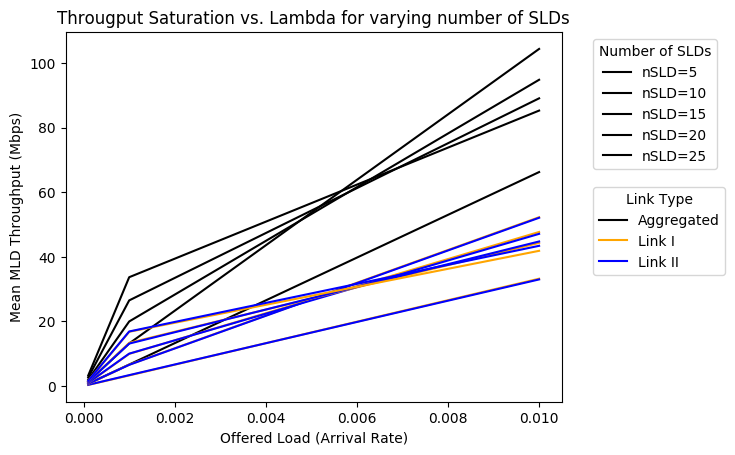

In [ ]:
x = np.array(data[29])                        # Lambda
mean_throughputL1 = np.array(data[3])    # MLD Throughput Link 1
mean_throughputL2 = np.array(data[4])      # MLD Throughput Link 2
mean_throughputAgg = np.array(data[5])       # MLD Throughput Aggregated
n_slds = np.array(data[28])                # Num. SLDs

plt.figure()

link_handles = []
link_labels = ["Aggregated", "Link I", "Link II"]

colors = plt.cm.plasma(np.linspace(0, 1, len((n_slds))))
base_color_idx = int(len(n_slds)/3)


for idx, n in enumerate(np.unique(n_slds)):
    subset = n_slds == n
    agg_line, = plt.plot(np.sort(x[subset]), np.sort(mean_throughputAgg[subset]), marker='o', label=f'nSLD={n}', color='black')
    l1_line, = plt.plot(np.sort(x[subset]), np.sort(mean_throughputL1[subset]), marker='*', color='orange')
    l2_line, = plt.plot(np.sort(x[subset]), np.sort(mean_throughputL2[subset]), marker='s', color='blue')

    if idx == 0:
        link_handles.extend([agg_line, l1_line, l2_line])

# Create the shared legend for n_slds
n_slds_legend = plt.legend(title="Number of SLDs", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.gca().add_artist(n_slds_legend)  # Add the first legend to the plot

# Create the legend for links
plt.legend(link_handles, link_labels, title="Link Type", loc="upper left", bbox_to_anchor=(1.05, 0.6))

plt.xlabel("Offered Load (Arrival Rate)")
plt.ylabel("Mean MLD Throughput (Mbps)")
plt.title("Througput Saturation vs. Lambda for varying number of SLDs")
plt.savefig(dir+'/plot.png', format='png', dpi=300)

# plt.figure()
#
# colors = plt.cm.plasma(np.linspace(0, 1, len(np.unique(n_slds))))
# for idx, n in enumerate(np.unique(n_slds)):
#     subset = n_slds == n
#     #plt.plot(x[subset], mean_throughputL1[subset], label=f'Link I -- nSLD={n}', color=colors[idx])
#     # plt.plot(x[subset], mean_throughputL2[subset], label=f'Link II -- nSLD={n}', color=colors[idx])
#     plt.plot(np.sort(x[subset]), np.sort(mean_throughputL1[subset]), marker='o', label=f'Link I, nSLD={n}', color=colors[idx])

# plt.legend()
# plt.xlabel("Offered Load (Arrival Rate)")
# plt.ylabel("Mean MLD Throughput (Mbps)")
# plt.title("Througput Saturation vs. Lambda for varying number of SLDs")
# plt.savefig(dir+'/L1plot.png', format='png', dpi=300)

# plt.figure()

# colors = plt.cm.plasma(np.linspace(0, 1, len(np.unique(n_slds))))
# for idx, n in enumerate(np.unique(n_slds)):
#     subset = n_slds == n
#     #plt.plot(x[subset], mean_throughputL1[subset], label=f'Link I -- nSLD={n}', color=colors[idx])
#     # plt.plot(x[subset], mean_throughputL2[subset], label=f'Link II -- nSLD={n}', color=colors[idx])
#     plt.plot(np.sort(x[subset]), np.sort(mean_throughputL2[subset]), marker='o', label=f'Link II, nSLD={n}', color=colors[idx])

# plt.legend()
# plt.xlabel("Offered Load (Arrival Rate)")
# plt.ylabel("Mean MLD Throughput (Mbps)")
# plt.title("Througput Saturation vs. Lambda for varying number of SLDs")
# plt.savefig(dir+'/L2plot.png', format='png', dpi=300)

In [78]:
[10 ** n for n in np.arange(-4.0, 0, 1.0)]

[0.0001, 0.001, 0.01, 0.1]

In [81]:
[n for n in range(5, 31, 5)]

[5, 10, 15, 20, 25, 30]

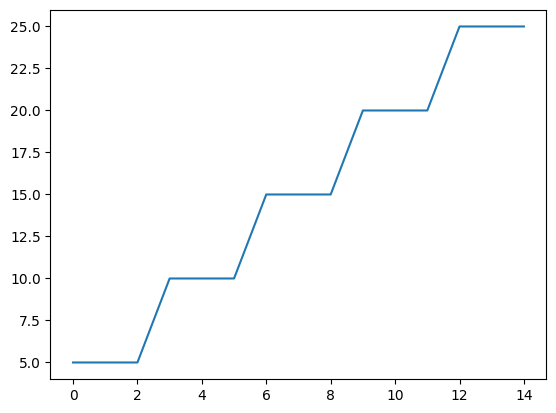

In [ ]:
plt.plot(n_slds)
